# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 3.4: Algoritmos de classificação**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código apresenta o uso de diferentes algoritmos de classificação*

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, cancer.target, test_size=0.4, random_state=0, stratify=cancer.target)

# kNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(n_neighbors=5)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        85
           1       0.94      0.94      0.94       143

    accuracy                           0.92       228
   macro avg       0.92      0.92      0.92       228
weighted avg       0.92      0.92      0.92       228



In [ ]:
cls.predict_proba(X_test.iloc[1:10,]).round(4)

array([[1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression(random_state=21, max_iter=3000)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        85
           1       0.96      0.96      0.96       143

    accuracy                           0.95       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.95      0.95      0.95       228



In [ ]:
cls.predict_proba(X_test.iloc[1:10,]).round(3)

array([[1.   , 0.   ],
       [1.   , 0.   ],
       [0.002, 0.998],
       [0.   , 1.   ],
       [0.082, 0.918],
       [0.001, 0.999],
       [0.516, 0.484],
       [0.998, 0.002],
       [1.   , 0.   ]])

In [ ]:
print(cls.intercept_)
print(cls.coef_)

[39.91895089]
[[ 0.85250144  0.23420031 -0.32880663  0.02668855 -0.10435555 -0.19499467
  -0.39726534 -0.19056066 -0.1630606  -0.02969075 -0.10586953  0.62127527
   0.6583754  -0.1206073  -0.01674037 -0.01684984 -0.07158278 -0.02720328
  -0.02575459 -0.00157205 -0.10992829 -0.48264813 -0.19425491 -0.00657071
  -0.20981887 -0.61680589 -0.97247588 -0.34808293 -0.40211524 -0.08244954]]


## Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier


cls = DecisionTreeClassifier(random_state=0)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        85
           1       0.98      0.92      0.95       143

    accuracy                           0.94       228
   macro avg       0.93      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228



In [ ]:
cls.predict_proba(X_test.iloc[1:10,]).round(3)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

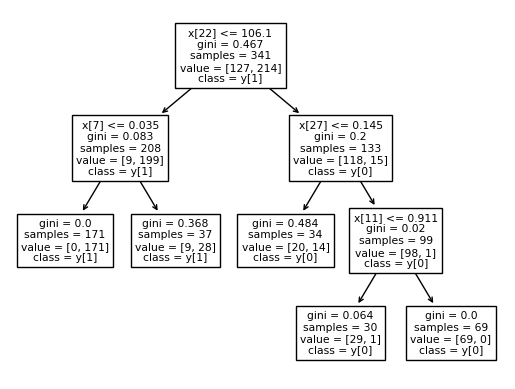

In [ ]:
from sklearn.tree import plot_tree

#cls = DecisionTreeClassifier(max_depth=3)
cls = DecisionTreeClassifier(min_samples_leaf=30)
cls.fit(X_train, y_train)

_ = plot_tree(cls, class_names=True)

## SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC


cls = SVC(random_state=0, probability=True)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        85
           1       0.89      0.98      0.93       143

    accuracy                           0.91       228
   macro avg       0.92      0.89      0.90       228
weighted avg       0.92      0.91      0.91       228



In [ ]:
cls.predict_proba(X_test.iloc[1:10,]).round(3)

array([[0.998, 0.002],
       [0.999, 0.001],
       [0.102, 0.898],
       [0.022, 0.978],
       [0.175, 0.825],
       [0.05 , 0.95 ],
       [0.415, 0.585],
       [0.966, 0.034],
       [0.999, 0.001]])

## Validação cruzada

Lista de medidas:
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_digits


digits = load_digits(as_frame=True)

In [ ]:
knn = cls = KNeighborsClassifier()
lr = LogisticRegression(max_iter=5000)
dt = DecisionTreeClassifier()
svm = SVC(random_state=0, probability=True)

for cls in [knn, lr, dt, svm]:
  scores = cross_val_score(cls, digits['data'], digits['target'], cv=5, scoring='f1_macro')
  print(cls, scores.mean())

KNeighborsClassifier() 0.9626496370410162
LogisticRegression(max_iter=5000, random_state=21) 0.9131093797649441
DecisionTreeClassifier() 0.7834232012228751
SVC(probability=True, random_state=0) 0.9630401013994254


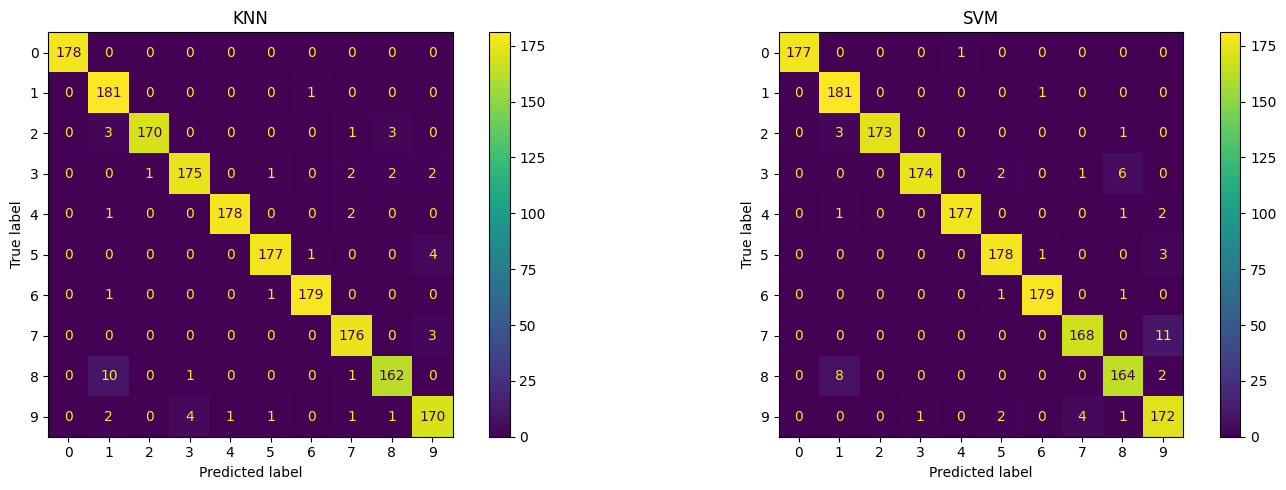

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_knn = cross_val_predict(knn, digits['data'], digits['target'], cv=10)
y_pred_svm = cross_val_predict(svm, digits['data'], digits['target'], cv=10)

disp1 = ConfusionMatrixDisplay(confusion_matrix(digits['target'], y_pred_knn))
disp2 = ConfusionMatrixDisplay(confusion_matrix(digits['target'], y_pred_svm))

# Crie subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

disp1.plot(ax=axes[0])
disp1.ax_.set_title("KNN")
disp2.plot(ax=axes[1])
disp2.ax_.set_title("SVM")

plt.tight_layout()
plt.show()